In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
pd.set_option('display.max_columns', None)
three_df = pd.read_csv('ThreeSubjectheadings.csv')
one_df = pd.read_csv('OneSubjectHeading.csv')

In [59]:
three_df.head()

,Item Loan Id,Loan Date,In House Loan Indicator,Barcode,Permanent Call Number,Circulation Library Code,Owning Library Code,Title (Complete),Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9.913933e+15,NaN
1,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Metropolitan areas,9.913933e+15,NaN
2,2252958767220001701,1/2/2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Urbanization,9.913933e+15,NaN
3,2252959196040001701,1/2/2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9.930690e+15,NaN
4,2252959196040001701,1/2/2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Historic buildings--United States,9.930690e+15,NaN


In [60]:
# rename columns
one_df = one_df.rename(columns={'Title (Complete)' : 'Title',
                   'Permanent Call Number' : 'Call Number',
               'Loan Date' : 'Date'})

#convert to string and change year to whole year
one_df['Date'] = one_df['Date'].astype(str).str[-4:]
one_df.head(5)

,Item Loan Id,Date,In House Loan Indicator,Barcode,Call Number,Circulation Library Code,Owning Library Code,Title,Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9913933350001701,NaN
1,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9930689970001701,NaN
2,2252965815260001701,2018,N,31951P012191854,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
3,2252965816190001701,2018,N,31951P012191862,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
4,2252965817370001701,2018,N,31951P012055993,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN


In [61]:
# rename columns
three_df = three_df.rename(columns={'Title (Complete)' : 'Title',
                   'Permanent Call Number' : 'Call Number',
               'Loan Date' : 'Date'})

#convert to string and change year to whole year
three_df['Date'] = three_df['Date'].astype(str).str[-4:]
three_df.head(5)

,Item Loan Id,Date,In House Loan Indicator,Barcode,Call Number,Circulation Library Code,Owning Library Code,Title,Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9.913933e+15,NaN
1,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Metropolitan areas,9.913933e+15,NaN
2,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Urbanization,9.913933e+15,NaN
3,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9.930690e+15,NaN
4,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Historic buildings--United States,9.930690e+15,NaN


In [62]:
# Create a mask to subset data by year
def Mask(year, df):
    mask_year = df[(df.Date == year)]
    #mask_year.to_csv('FirstThree' + 'AlmaData' + str(year) +'.csv', index=False )
    # print(mask_year)
    return(mask_year)

for i in range(2018,2024):
    files = Mask(str(i), three_df)
    uniques = (i, len(files['Subjects'].unique()))
    print(uniques)


In [63]:
three_df_counts = three_df['Date'].value_counts().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
allcheckouts = three_df_counts['Counts'].sum()
three_df_counts['Total Counts %'] = three_df_counts['Counts'] / allcheckouts
three_df_counts

,Date,Counts,Total Counts %
0,2018,14397,0.282427
1,2019,13488,0.264595
2,2022,6526,0.128021
3,2023,6411,0.125765
4,2021,5200,0.102009
5,2020,4954,0.097183


In [64]:
three_subject_counts = three_df['Subjects'].value_counts()
three_subject_counts.head(25)

Subjects
Architecture--Periodicals                                1061
Architecture, Modern--20th century                        789
Architecture--Spain--Periodicals.                         569
Architecture--Espagne--20e siècle--Périodiques.         566
Architecture                                              435
Architecture, Modern--21st century                        403
City planning                                             374
Architectural design                                      302
Architecture and society                                  276
Architecture--Philosophy                                  267
Landscape architecture                                    246
Architecture--Environmental aspects                       229
Sustainable architecture                                  208
Architecture--Human factors                               208
Building--Periodicals                                     206
Architecture--United States--History--20th century        189

In [65]:
one_subject_counts = one_df['Subjects'].value_counts()
one_subject_counts.head(25)

Subjects
Architecture--Spain--Periodicals.                          569
Architecture--Periodicals                                  432
Architecture, Modern--20th century                         253
City planning                                              177
Architecture                                               136
Architecture and society                                   128
Architectural design                                       125
Architecture--Philosophy                                   120
Architecture--Environmental aspects                        119
Landscape architecture                                     114
Andō, Tadao,--1941-                                        110
Architecture, Domestic--Designs and plans                  101
Building, Wooden                                            78
Architecture--Human factors                                 77
Sustainable architecture                                    73
City planning--United States                  

<Axes: ylabel='Subjects'>

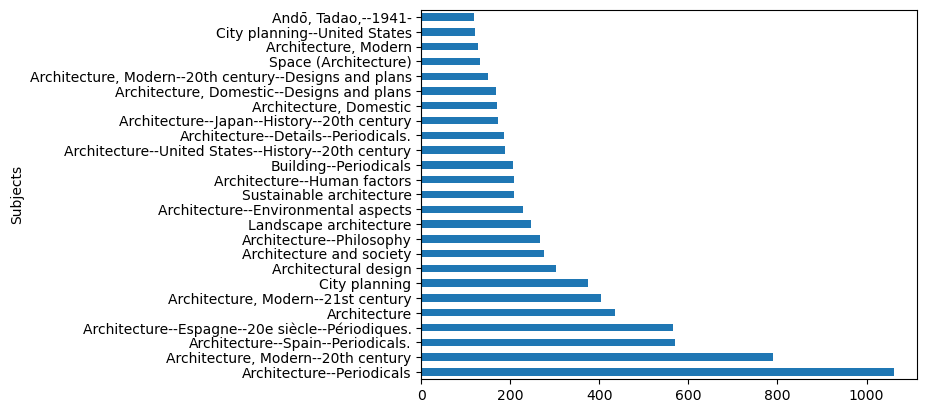

In [66]:
# Create a bar plot of top 25 subject headings for the first three subjects DataFrame

three_subject_counts.head(25).plot.barh()

<Axes: ylabel='Subjects'>

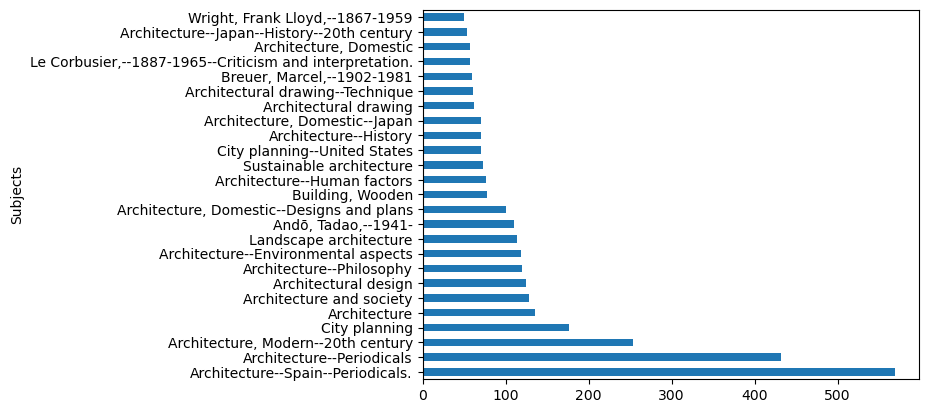

In [67]:
# Create a bar plot of top 25 subject headings for the first subject DataFrame

one_subject_counts.head(25).plot.barh()

In [68]:
# Create DataFrames from Series
df1 = pd.DataFrame(three_subject_counts).reset_index()
df2 = pd.DataFrame(one_subject_counts).reset_index()

# Merge SeriDataFrames into one DataFrame
bar_df = pd.merge(df1, df2, how='left', on='Subjects')
bar_df = bar_df.rename(columns={'count_x': 'Three Subjects', 'count_y': 'First Subjects'})
bar_df.head(25)

,Subjects,Three Subjects,First Subjects
0,Architecture--Periodicals,1061,432.0
1,"Architecture, Modern--20th century",789,253.0
2,Architecture--Spain--Periodicals.,569,569.0
3,Architecture--Espagne--20e siècle--Périodiques.,566,NaN
4,Architecture,435,136.0
5,"Architecture, Modern--21st century",403,50.0
6,City planning,374,177.0
7,Architectural design,302,125.0
8,Architecture and society,276,128.0
9,Architecture--Philosophy,267,120.0


<Axes: ylabel='Subjects'>

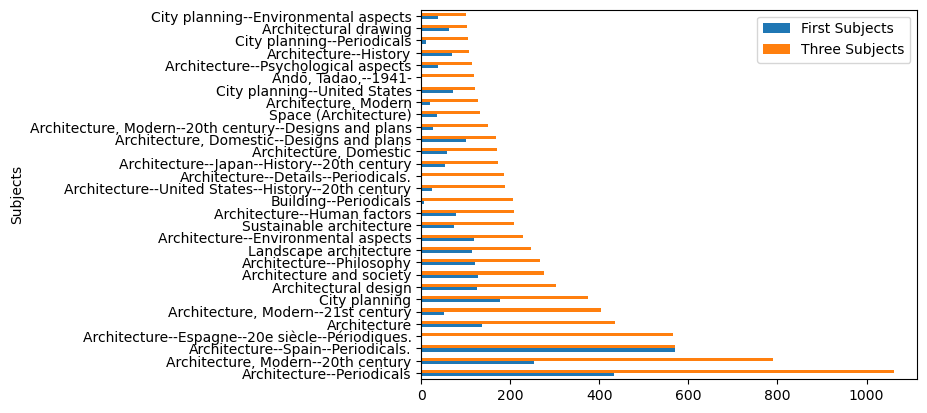

In [69]:
# Create double bar graph of both different subject headings

bar_df = bar_df.head(30)
bar_df.plot(x='Subjects', y=['First Subjects', 'Three Subjects'], kind='barh')

In [70]:
one_df.groupby('Subjects').size().sort_values(ascending=[False]).head(25)


Subjects
Architecture--Spain--Periodicals.                          569
Architecture--Periodicals                                  432
Architecture, Modern--20th century                         253
City planning                                              177
Architecture                                               136
Architecture and society                                   128
Architectural design                                       125
Architecture--Philosophy                                   120
Architecture--Environmental aspects                        119
Landscape architecture                                     114
Andō, Tadao,--1941-                                        110
Architecture, Domestic--Designs and plans                  101
Building, Wooden                                            78
Architecture--Human factors                                 77
Sustainable architecture                                    73
City planning--United States                  

In [71]:
three_df.groupby('Subjects').size().sort_values(ascending=[False]).head(25)

Subjects
Architecture--Periodicals                                1061
Architecture, Modern--20th century                        789
Architecture--Spain--Periodicals.                         569
Architecture--Espagne--20e siècle--Périodiques.         566
Architecture                                              435
Architecture, Modern--21st century                        403
City planning                                             374
Architectural design                                      302
Architecture and society                                  276
Architecture--Philosophy                                  267
Landscape architecture                                    246
Architecture--Environmental aspects                       229
Architecture--Human factors                               208
Sustainable architecture                                  208
Building--Periodicals                                     206
Architecture--United States--History--20th century        189

In [72]:
# Create a number of counts via group by author and date for the first subject DataFrame

AuthorCounts = one_df.groupby(['Author', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
AuthorCounts.reset_index(drop = True).head(25)

,Author,Date,Counts
0,"Ando?, Tadao, 1941-",2018,33
1,"Ando?, Tadao, 1941-",2021,25
2,"Breuer, Marcel, 1902-1981",2019,23
3,"Holl, Steven",2019,21
4,"Le Corbusier, 1887-1965",2018,21
5,"Ching, Francis D. K., 1943-",2018,20
6,"Ando?, Tadao, 1941-",2019,20
7,"Ando?, Tadao, 1941-",2023,19
8,"Koolhaas, Rem author.",2018,18
9,"Frampton, Kenneth",2018,17


In [73]:
# Create a number of counts via group by author and date for the first three subjects DataFrame

ThreeAuthorCounts = three_df.groupby(['Author', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
ThreeAuthorCounts.reset_index(drop = True).head(25)

,Author,Date,Counts
0,"Andō, Tadao, 1941-",2018,104
1,"Brown, Jackum",2022,87
2,"Frampton, Kenneth",2019,80
3,"Olmsted, Frederick Law, 1822-1903.",2019,78
4,"Andō, Tadao, 1941-",2021,77
5,"Minke, Gernot",2021,76
6,"Jodidio, Philip",2023,74
7,"Etlin, Richard A.",2018,68
8,"Ching, Francis D. K., 1943-",2018,67
9,"Koolhaas, Rem",2019,65


In [74]:
# Create a number of counts via group by subjects and date for the first subject DataFrame

counts = one_df.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

heads = counts.head(50).reset_index(drop=True)

tails = counts.tail(50).reset_index(drop=True) 

#heads.to_csv('2020Heads.csv', index=False)  
#tails.to_csv('2020Tails.csv', index=False)  
counts

,Subjects,Date,Counts
2246,Architecture--Periodicals,2019,173
2371,Architecture--Spain--Periodicals.,2019,159
2245,Architecture--Periodicals,2018,138
2374,Architecture--Spain--Periodicals.,2022,129
2370,Architecture--Spain--Periodicals.,2018,109
...,...,...,...
4552,"Decoration and ornament, Architectural--United...",2019,1
4553,Decoration and ornament--Japan,2018,1
4554,Decoration and ornament--Japan,2019,1
4558,Decoration and ornament--Japan--Pictorial works.,2022,1


In [75]:
def DiffPerc(df,head, order):
    # use mask function to subset by year
    subset_2018 = Mask('2018', df)
    subset_2019 = Mask('2019', df)
    subset_2020 = Mask('2020', df)
    subset_2021 = Mask('2021', df)
    subset_2022 = Mask('2022', df)
    subset_2023 = Mask('2023', df)
    
    # group by counts for every year

    
    counts_2018 = subset_2018.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2019 = subset_2019.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2020 = subset_2020.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2021 = subset_2021.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2022 = subset_2022.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    counts_2023 = subset_2023.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
    
     # create total checkouts variable for every year
    checkouts2018 = counts_2018['Counts'].sum()

    checkouts2019 = counts_2019['Counts'].sum()

    checkouts2020 = counts_2020['Counts'].sum()

    checkouts2021 = counts_2021['Counts'].sum()

    checkouts2022 = counts_2022['Counts'].sum()

    checkouts2023 = counts_2023['Counts'].sum()

 
    # create counts variable for every year

    counts_2018['Subj %'] = counts_2018['Counts'] / checkouts2018

    counts_2019['Subj %'] = counts_2019['Counts'] / checkouts2019
 
    counts_2020['Subj %'] = counts_2020['Counts'] / checkouts2020
 
    counts_2021['Subj %'] = counts_2021['Counts'] / checkouts2021
 
    counts_2022['Subj %'] = counts_2022['Counts'] / checkouts2022
 
    counts_2023['Subj %'] = counts_2023['Counts'] / checkouts2023
    
    merged_df = pd.merge(counts_2018, counts_2019, how='left', on='Subjects')

    merged_df = merged_df.rename(columns={'Date_x' : 'Date 2018',
                    'Counts_x' : 'Counts 2018',
                'Subj %_x' : 'Subj % 2018',
                'Date_y' : 'Date 2019',
                    'Counts_y' : 'Counts 2019',
                'Subj %_y' : 'Subj % 2019'})
    
    merged_df2 = pd.merge(merged_df, counts_2020, how='left', on='Subjects')
    merged_df2 = merged_df2.rename(columns={'Date' : 'Date 2020',
                    'Counts' : 'Counts 2020',
                'Subj %' : 'Subj % 2020'})
    
    merged_df3 = pd.merge(merged_df2, counts_2021, how='left', on='Subjects')
    merged_df3 = merged_df3.rename(columns={'Date' : 'Date 2021',
                    'Counts' : 'Counts 2021',
                'Subj %' : 'Subj % 2021'})
    
    merged_df4 = pd.merge(merged_df3, counts_2022, how='left', on='Subjects')
    merged_df4 = merged_df4.rename(columns={'Date' : 'Date 2022',
                    'Counts' : 'Counts 2022',
                'Subj %' : 'Subj % 2022'})
    
    merged_df5 = pd.merge(merged_df4, counts_2023, how='left', on='Subjects')
    merged_df5 = merged_df5.rename(columns={'Date' : 'Date 2023',
                    'Counts' : 'Counts 2023',
                'Subj %' : 'Subj % 2023'})
    
    # subset df
    merged_df5 =merged_df5[['Subjects', 'Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023']]

    # create new column by substracting % of 2023 - 2018
    merged_df5['2023 Diff 2018'] = merged_df5['Subj % 2023'] - merged_df5['Subj % 2018']

    merged_df5['2022 Diff 2018'] = merged_df5['Subj % 2022'] - merged_df5['Subj % 2018']

    merged_df5['2021 Diff 2018'] = merged_df5['Subj % 2021'] - merged_df5['Subj % 2018']

    merged_df5['2020 Diff 2018'] = merged_df5['Subj % 2020'] - merged_df5['Subj % 2018']

    merged_df5['2019 Diff 2018'] = merged_df5['Subj % 2019'] - merged_df5['Subj % 2018']

    #merged_df5 = merged_df5.head(head).sort_values(by=['Subj % 2023'], ascending=[order]).reset_index(drop=True)
    merged_df5 = merged_df5.sort_values(by=['Subj % 2023'], ascending=[order]).reset_index(drop=True)

    merged_df5 = merged_df5[['Subjects', 'Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023', 
                             '2019 Diff 2018', '2020 Diff 2018','2021 Diff 2018', '2022 Diff 2018',  '2023 Diff 2018']]

  
    return merged_df5

    
    

In [76]:
diff_three_df2023 = DiffPerc(three_df, 15, False)
diff_three_df2023


,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018
0,Architecture--Periodicals,0.019310,0.026097,0.007872,0.015000,0.028195,0.020278,0.006788,-0.011437,-0.004310,0.008885,0.000968
1,Architecture--Spain--Periodicals.,0.007571,0.011788,0.005046,0.009615,0.019767,0.015130,0.004217,-0.002525,0.002044,0.012196,0.007559
2,Architecture--Espagne--20e siècle--Périodiques.,0.007502,0.011714,0.004845,0.009615,0.019767,0.015130,0.004213,-0.002657,0.002114,0.012266,0.007629
3,"Architecture, Modern--20th century",0.015628,0.015644,0.016149,0.017500,0.014251,0.013882,0.000015,0.000520,0.001872,-0.001378,-0.001746
4,Architecture,0.008821,0.009267,0.005450,0.005962,0.008734,0.010607,0.000446,-0.003371,-0.002860,-0.000087,0.001785
...,...,...,...,...,...,...,...,...,...,...,...,...
6451,Disasters--Social aspects--New York (State)--N...,0.000069,NaN,NaN,0.000192,NaN,NaN,NaN,NaN,0.000123,NaN,NaN
6452,Disasters,0.000069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6453,Disaster victims--Dwellings--Design and constr...,0.000069,0.000074,NaN,NaN,NaN,NaN,0.000005,NaN,NaN,NaN,NaN
6454,Disaster relief,0.000069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
diff_one_df2023 = DiffPerc(one_df, 15, False)
diff_one_df2023

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.010577,-0.005934,0.005545,0.031030,0.019113
1,Architecture--Periodicals,0.023457,0.031668,0.005038,0.013481,0.020745,0.011253,0.008210,-0.018420,-0.009976,-0.002712,-0.012204
2,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.002929,0.000643,0.004361,0.001846,0.008098
3,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.001582,0.009189,-0.001021,-0.000452,0.005792
4,"Architecture, Modern--20th century",0.011899,0.013546,0.015617,0.015888,0.008836,0.008537,0.001647,0.003718,0.003990,-0.003063,-0.003362
...,...,...,...,...,...,...,...,...,...,...,...,...
2882,Dumbarton Oaks--History.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN
2883,"Dujardin, Filip.",0.000170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,Drawing--Psychological aspects.,0.000170,NaN,NaN,0.000963,0.000384,NaN,NaN,NaN,0.000793,0.000214,NaN
2885,Drawing instruments--Exhibitions.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN


In [78]:
DiffPerc(one_df, 15, False)

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.010577,-0.005934,0.005545,0.031030,0.019113
1,Architecture--Periodicals,0.023457,0.031668,0.005038,0.013481,0.020745,0.011253,0.008210,-0.018420,-0.009976,-0.002712,-0.012204
2,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.002929,0.000643,0.004361,0.001846,0.008098
3,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.001582,0.009189,-0.001021,-0.000452,0.005792
4,"Architecture, Modern--20th century",0.011899,0.013546,0.015617,0.015888,0.008836,0.008537,0.001647,0.003718,0.003990,-0.003063,-0.003362
...,...,...,...,...,...,...,...,...,...,...,...,...
2882,Dumbarton Oaks--History.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN
2883,"Dujardin, Filip.",0.000170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,Drawing--Psychological aspects.,0.000170,NaN,NaN,0.000963,0.000384,NaN,NaN,NaN,0.000793,0.000214,NaN
2885,Drawing instruments--Exhibitions.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN


In [79]:
# use mask function to subset by year
subset_2018 = Mask('2018', one_df)
subset_2019 = Mask('2019', one_df)
subset_2020 = Mask('2020', one_df)
subset_2021 = Mask('2021', one_df)
subset_2022 = Mask('2022', one_df)
subset_2023 = Mask('2023', one_df)


In [80]:
# group by counts for every year

counts_2018 = subset_2018.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2019 = subset_2019.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2020 = subset_2020.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2021 = subset_2021.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2022 = subset_2022.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

counts_2023 = subset_2023.groupby(['Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])

 
 # create total checkouts variable for every year
checkouts2018 = counts_2018['Counts'].sum()

checkouts2019 = counts_2019['Counts'].sum()

checkouts2020 = counts_2020['Counts'].sum()

checkouts2021 = counts_2021['Counts'].sum()

checkouts2022 = counts_2022['Counts'].sum()

checkouts2023 = counts_2023['Counts'].sum()

 
 # create counts variable for every year

counts_2018['Subj %'] = counts_2018['Counts'] / checkouts2018

counts_2019['Subj %'] = counts_2019['Counts'] / checkouts2019
 
counts_2020['Subj %'] = counts_2020['Counts'] / checkouts2020
 
counts_2021['Subj %'] = counts_2021['Counts'] / checkouts2021
 
counts_2022['Subj %'] = counts_2022['Counts'] / checkouts2022
 
counts_2023['Subj %'] = counts_2023['Counts'] / checkouts2023


In [81]:
merged_df = pd.merge(counts_2018, counts_2019, how='left', on='Subjects')

merged_df = merged_df.rename(columns={'Date_x' : 'Date 2018',
                   'Counts_x' : 'Counts 2018',
               'Subj %_x' : 'Subj % 2018',
               'Date_y' : 'Date 2019',
                   'Counts_y' : 'Counts 2019',
               'Subj %_y' : 'Subj % 2019'})

In [82]:
merged_df2 = pd.merge(merged_df, counts_2020, how='left', on='Subjects')
merged_df2 = merged_df2.rename(columns={'Date' : 'Date 2020',
                   'Counts' : 'Counts 2020',
               'Subj %' : 'Subj % 2020'})

In [83]:
merged_df3 = pd.merge(merged_df2, counts_2021, how='left', on='Subjects')
merged_df3 = merged_df3.rename(columns={'Date' : 'Date 2021',
                   'Counts' : 'Counts 2021',
               'Subj %' : 'Subj % 2021'})

In [84]:
merged_df4 = pd.merge(merged_df3, counts_2022, how='left', on='Subjects')
merged_df4 = merged_df4.rename(columns={'Date' : 'Date 2022',
                   'Counts' : 'Counts 2022',
               'Subj %' : 'Subj % 2022'})

In [85]:
merged_df5 = pd.merge(merged_df4, counts_2023, how='left', on='Subjects')
merged_df5 = merged_df5.rename(columns={'Date' : 'Date 2023',
                   'Counts' : 'Counts 2023',
               'Subj %' : 'Subj % 2023'})
merged_df5.head(15).sort_values(by=['Subj % 2023'], ascending=[True])


,Subjects,Date 2018,Counts 2018,Subj % 2018,Date 2019,Counts 2019,Subj % 2019,Date 2020,Counts 2020,Subj % 2020,Date 2021,Counts 2021,Subj % 2021,Date 2022,Counts 2022,Subj % 2022,Date 2023,Counts 2023,Subj % 2023
12,"Breuer, Marcel,--1902-1981",2018,23,0.003910,2019,24.0,0.004393,2020,4.0,0.002015,2021,3.0,0.001444,2022,4.0,0.001537,2023,2.0,0.000776
10,Architecture--History,2018,24,0.004080,2019,12.0,0.002197,2020,8.0,0.004030,2021,16.0,0.007703,2022,6.0,0.002305,2023,4.0,0.001552
13,"Le Corbusier,--1887-1965--Criticism and interp...",2018,23,0.003910,2019,12.0,0.002197,2020,5.0,0.002519,2021,8.0,0.003852,2022,4.0,0.001537,2023,5.0,0.001940
5,Architecture--Philosophy,2018,42,0.007139,2019,32.0,0.005858,2020,13.0,0.006549,2021,6.0,0.002889,2022,14.0,0.005378,2023,13.0,0.005045
7,Architecture and society,2018,36,0.006119,2019,33.0,0.006041,2020,16.0,0.008060,2021,13.0,0.006259,2022,14.0,0.005378,2023,16.0,0.006209
4,Architecture,2018,45,0.007649,2019,41.0,0.007505,2020,8.0,0.004030,2021,8.0,0.003852,2022,16.0,0.006147,2023,18.0,0.006985
8,"Andō, Tadao,--1941-",2018,34,0.005779,2019,22.0,0.004027,2020,4.0,0.002015,2021,26.0,0.012518,2022,6.0,0.002305,2023,18.0,0.006985
3,City planning,2018,60,0.010199,2019,32.0,0.005858,2020,31.0,0.015617,2021,17.0,0.008185,2022,18.0,0.006915,2023,19.0,0.007373
14,Landscape architecture,2018,22,0.003740,2019,32.0,0.005858,2020,8.0,0.004030,2021,15.0,0.007222,2022,17.0,0.006531,2023,20.0,0.007761
2,"Architecture, Modern--20th century",2018,70,0.011899,2019,74.0,0.013546,2020,31.0,0.015617,2021,33.0,0.015888,2022,23.0,0.008836,2023,22.0,0.008537


In [86]:
# subset df
merged_df5 =merged_df5[['Subjects', 'Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023']]

# create new column by substracting % of 2023 - 2018
merged_df5['2023 Diff 2018'] = merged_df5['Subj % 2023'] - merged_df5['Subj % 2018']

merged_df5['2022 Diff 2018'] = merged_df5['Subj % 2022'] - merged_df5['Subj % 2018']

merged_df5['2021 Diff 2018'] = merged_df5['Subj % 2021'] - merged_df5['Subj % 2018']

merged_df5['2020 Diff 2018'] = merged_df5['Subj % 2020'] - merged_df5['Subj % 2018']

merged_df5['2019 Diff 2018'] = merged_df5['Subj % 2019'] - merged_df5['Subj % 2018']





# sort values by new column
merged_df5.head(50).reset_index(drop=True).sort_values(by=['2023 Diff 2018'], ascending=[False]).reset_index(drop=True)

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2023 Diff 2018,2022 Diff 2018,2021 Diff 2018,2020 Diff 2018,2019 Diff 2018
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.019113,0.031030,0.005545,-0.005934,0.010577
1,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.008098,0.001846,0.004361,0.000643,0.002929
2,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.005792,-0.000452,-0.001021,0.009189,0.001582
3,Landscape architecture,0.003740,0.005858,0.004030,0.007222,0.006531,0.007761,0.004021,0.002791,0.003482,0.000291,0.002118
4,"Building, Wooden",0.002720,0.004210,0.001008,0.002407,0.006147,0.006209,0.003489,0.003427,-0.000312,-0.001712,0.001490
5,"Architecture, Domestic",0.002380,0.002014,0.002519,0.003370,0.002689,0.005045,0.002665,0.000309,0.000991,0.000139,-0.000366
6,Architectural design,0.006629,0.004210,0.007053,0.003852,0.007299,0.008537,0.001908,0.000670,-0.002778,0.000424,-0.002419
7,Sustainable architecture,0.003230,0.003844,0.004030,0.003370,0.001921,0.005045,0.001815,-0.001309,0.000141,0.000801,0.000614
8,City planning--United States,0.002890,0.003478,0.004030,0.004815,0.002305,0.004269,0.001379,-0.000585,0.001925,0.001141,0.000588
9,"Andō, Tadao,--1941-",0.005779,0.004027,0.002015,0.012518,0.002305,0.006985,0.001206,-0.003474,0.006739,-0.003764,-0.001752


In [87]:
diff_dec_df2023 = merged_df5.reset_index(drop=True).sort_values(by=['2023 Diff 2018'], ascending=[True])
diff_dec_df2023.head(15)

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2023 Diff 2018,2022 Diff 2018,2021 Diff 2018,2020 Diff 2018,2019 Diff 2018
0,Architecture--Periodicals,0.023457,0.031668,0.005038,0.013481,0.020745,0.011253,-0.012204,-0.002712,-0.009976,-0.018420,0.008210
2,"Architecture, Modern--20th century",0.011899,0.013546,0.015617,0.015888,0.008836,0.008537,-0.003362,-0.003063,0.003990,0.003718,0.001647
12,"Breuer, Marcel,--1902-1981",0.003910,0.004393,0.002015,0.001444,0.001537,0.000776,-0.003133,-0.002373,-0.002465,-0.001894,0.000484
16,"Kahn, Louis I.,--1901-1974",0.003740,0.001281,0.001511,0.002407,NaN,0.000776,-0.002963,NaN,-0.001332,-0.002228,-0.002458
3,City planning,0.010199,0.005858,0.015617,0.008185,0.006915,0.007373,-0.002826,-0.003284,-0.002014,0.005418,-0.004341
10,Architecture--History,0.004080,0.002197,0.004030,0.007703,0.002305,0.001552,-0.002527,-0.001775,0.003624,-0.000049,-0.001883
21,Building,0.002890,0.001281,0.001511,0.003370,0.001537,0.000388,-0.002502,-0.001353,0.000481,-0.001378,-0.001608
17,Architectural drawing--Technique,0.003570,0.003295,0.000504,0.004815,0.003073,0.001164,-0.002405,-0.000496,0.001245,-0.003066,-0.000275
25,"Le Corbusier,--1887-1965",0.002720,0.002014,0.001008,0.002889,0.000384,0.000388,-0.002332,-0.002336,0.000169,-0.001712,-0.000706
5,Architecture--Philosophy,0.007139,0.005858,0.006549,0.002889,0.005378,0.005045,-0.002095,-0.001761,-0.004250,-0.000590,-0.001282


In [88]:
diff_one_df2023 = diff_one_df2023.reset_index(drop=True).sort_values(by=['2023 Diff 2018'], ascending=[False])
diff_one_df2023

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.010577,-0.005934,0.005545,0.031030,0.019113
2,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.002929,0.000643,0.004361,0.001846,0.008098
3,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.001582,0.009189,-0.001021,-0.000452,0.005792
6,Landscape architecture,0.003740,0.005858,0.004030,0.007222,0.006531,0.007761,0.002118,0.000291,0.003482,0.002791,0.004021
11,"Building, Wooden",0.002720,0.004210,0.001008,0.002407,0.006147,0.006209,0.001490,-0.001712,-0.000312,0.003427,0.003489
...,...,...,...,...,...,...,...,...,...,...,...,...
2882,Dumbarton Oaks--History.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN
2883,"Dujardin, Filip.",0.000170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,Drawing--Psychological aspects.,0.000170,NaN,NaN,0.000963,0.000384,NaN,NaN,NaN,0.000793,0.000214,NaN
2885,Drawing instruments--Exhibitions.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN


In [89]:
diff_three_df2023 = diff_three_df2023.reset_index(drop=True).sort_values(by=['2023 Diff 2018'], ascending=[False])
diff_three_df2023

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018
2,Architecture--Espagne--20e siècle--Périodiques.,0.007502,0.011714,0.004845,0.009615,0.019767,0.015130,0.004213,-0.002657,2.113822e-03,0.012266,0.007629
1,Architecture--Spain--Periodicals.,0.007571,0.011788,0.005046,0.009615,0.019767,0.015130,0.004217,-0.002525,2.044363e-03,0.012196,0.007559
14,"Architecture, Domestic--Designs and plans",0.001875,0.003781,0.002826,0.004423,0.003065,0.005147,0.001906,0.000951,2.547686e-03,0.001189,0.003272
18,Architecture domestique.,0.000208,0.001186,0.000202,0.001346,0.000460,0.003276,0.000978,-0.000007,1.137777e-03,0.000251,0.003067
11,"Architecture, Modern--20th century--Designs an...",0.002501,0.003336,0.001413,0.002500,0.001992,0.005459,0.000836,-0.001088,-5.209419e-07,-0.000508,0.002959
...,...,...,...,...,...,...,...,...,...,...,...,...
6451,Disasters--Social aspects--New York (State)--N...,0.000069,NaN,NaN,0.000192,NaN,NaN,NaN,NaN,1.228488e-04,NaN,NaN
6452,Disasters,0.000069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6453,Disaster victims--Dwellings--Design and constr...,0.000069,0.000074,NaN,NaN,NaN,NaN,0.000005,NaN,NaN,NaN,NaN
6454,Disaster relief,0.000069,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [90]:
diff_one_df2023

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2019 Diff 2018,2020 Diff 2018,2021 Diff 2018,2022 Diff 2018,2023 Diff 2018
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.010577,-0.005934,0.005545,0.031030,0.019113
2,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.002929,0.000643,0.004361,0.001846,0.008098
3,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.001582,0.009189,-0.001021,-0.000452,0.005792
6,Landscape architecture,0.003740,0.005858,0.004030,0.007222,0.006531,0.007761,0.002118,0.000291,0.003482,0.002791,0.004021
11,"Building, Wooden",0.002720,0.004210,0.001008,0.002407,0.006147,0.006209,0.001490,-0.001712,-0.000312,0.003427,0.003489
...,...,...,...,...,...,...,...,...,...,...,...,...
2882,Dumbarton Oaks--History.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN
2883,"Dujardin, Filip.",0.000170,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2884,Drawing--Psychological aspects.,0.000170,NaN,NaN,0.000963,0.000384,NaN,NaN,NaN,0.000793,0.000214,NaN
2885,Drawing instruments--Exhibitions.,0.000170,NaN,NaN,0.000481,NaN,NaN,NaN,NaN,0.000311,NaN,NaN


In [91]:
# get some basic statistics
merged_df5.describe()

,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2023 Diff 2018,2022 Diff 2018,2021 Diff 2018,2020 Diff 2018,2019 Diff 2018
count,2887.000000,1252.000000,642.000000,658.000000,772.000000,724.000000,724.000000,772.000000,658.000000,642.000000,1252.000000
mean,0.000346,0.000528,0.000970,0.000940,0.000824,0.000861,0.000201,0.000185,0.000256,0.000285,0.000013
std,0.000772,0.001414,0.001369,0.001539,0.002089,0.001775,0.001108,0.001305,0.000873,0.001106,0.000591
min,0.000170,0.000183,0.000504,0.000481,0.000384,0.000388,-0.012204,-0.004501,-0.009976,-0.018420,-0.005086
25%,0.000170,0.000183,0.000504,0.000481,0.000384,0.000388,0.000048,0.000044,0.000142,0.000164,-0.000144
50%,0.000170,0.000183,0.000504,0.000481,0.000384,0.000388,0.000218,0.000214,0.000311,0.000334,0.000013
75%,0.000340,0.000549,0.001008,0.000963,0.000768,0.000776,0.000266,0.000214,0.000311,0.000334,0.000196
max,0.023457,0.031668,0.015617,0.024073,0.049558,0.037641,0.019113,0.031030,0.006739,0.009189,0.010577


In [92]:
diff_df2023 = merged_df5.head(50).reset_index(drop=True).sort_values(by=['2023 Diff 2018'], ascending=[False]).reset_index(drop=True)

<Axes: ylabel='Subjects'>

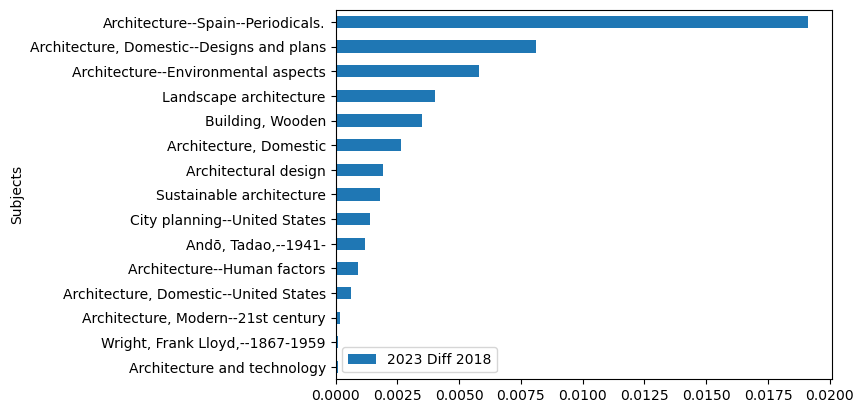

In [93]:
ax = diff_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y='2023 Diff 2018', kind="barh") 
ax

<Axes: ylabel='Subjects'>

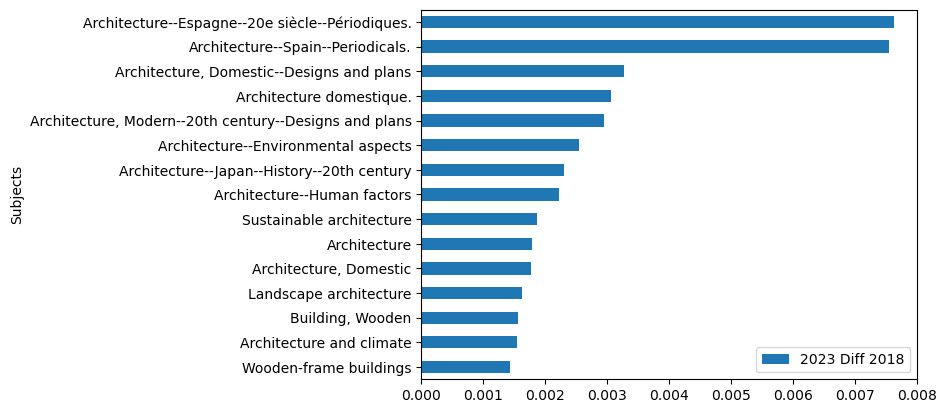

In [94]:
ax = diff_three_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y='2023 Diff 2018', kind="barh") 
ax

In [95]:
diff_df2023

,Subjects,Subj % 2018,Subj % 2019,Subj % 2020,Subj % 2021,Subj % 2022,Subj % 2023,2023 Diff 2018,2022 Diff 2018,2021 Diff 2018,2020 Diff 2018,2019 Diff 2018
0,Architecture--Spain--Periodicals.,0.018528,0.029105,0.012594,0.024073,0.049558,0.037641,0.019113,0.031030,0.005545,-0.005934,0.010577
1,"Architecture, Domestic--Designs and plans",0.002380,0.005308,0.003023,0.006740,0.004226,0.010477,0.008098,0.001846,0.004361,0.000643,0.002929
2,Architecture--Environmental aspects,0.003910,0.005491,0.013098,0.002889,0.003458,0.009701,0.005792,-0.000452,-0.001021,0.009189,0.001582
3,Landscape architecture,0.003740,0.005858,0.004030,0.007222,0.006531,0.007761,0.004021,0.002791,0.003482,0.000291,0.002118
4,"Building, Wooden",0.002720,0.004210,0.001008,0.002407,0.006147,0.006209,0.003489,0.003427,-0.000312,-0.001712,0.001490
5,"Architecture, Domestic",0.002380,0.002014,0.002519,0.003370,0.002689,0.005045,0.002665,0.000309,0.000991,0.000139,-0.000366
6,Architectural design,0.006629,0.004210,0.007053,0.003852,0.007299,0.008537,0.001908,0.000670,-0.002778,0.000424,-0.002419
7,Sustainable architecture,0.003230,0.003844,0.004030,0.003370,0.001921,0.005045,0.001815,-0.001309,0.000141,0.000801,0.000614
8,City planning--United States,0.002890,0.003478,0.004030,0.004815,0.002305,0.004269,0.001379,-0.000585,0.001925,0.001141,0.000588
9,"Andō, Tadao,--1941-",0.005779,0.004027,0.002015,0.012518,0.002305,0.006985,0.001206,-0.003474,0.006739,-0.003764,-0.001752


<Axes: ylabel='Subjects'>

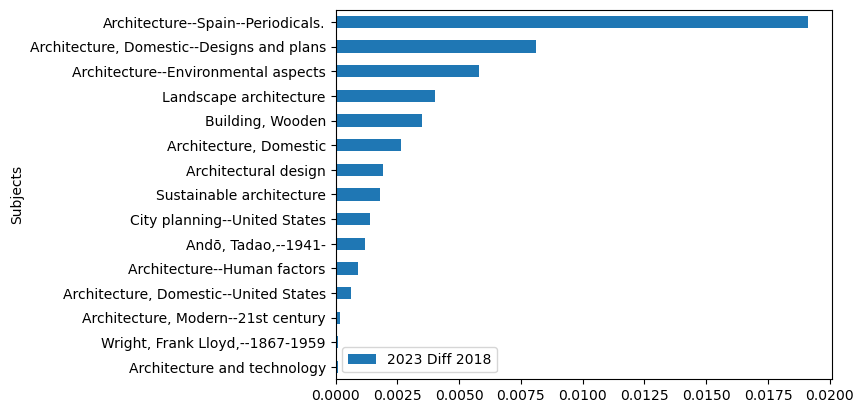

In [96]:
ax = diff_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y='2023 Diff 2018', kind="barh") 
ax

<Axes: ylabel='Subjects'>

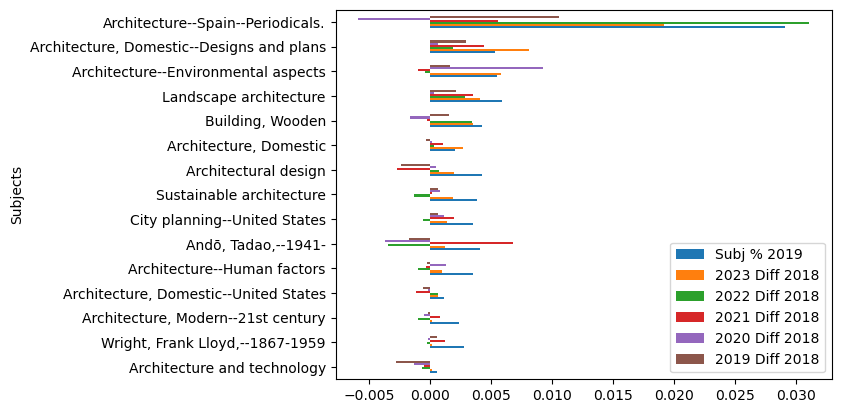

In [97]:
diff_all_plots = diff_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['Subj % 2019', '2023 Diff 2018', '2022 Diff 2018', '2021 Diff 2018', '2020 Diff 2018', '2019 Diff 2018'], kind="barh") 
diff_all_plots

<Axes: ylabel='Subjects'>

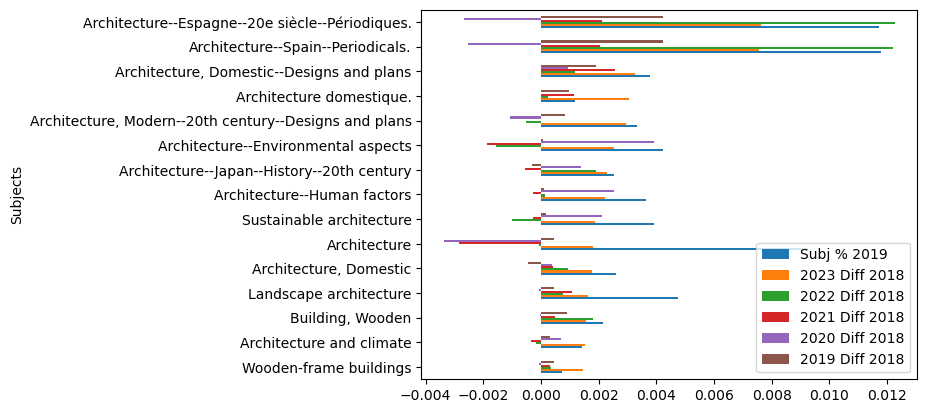

In [98]:
diff_all_plots = diff_three_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['Subj % 2019', '2023 Diff 2018', '2022 Diff 2018', '2021 Diff 2018', '2020 Diff 2018', '2019 Diff 2018'], kind="barh") 
diff_all_plots

<Axes: ylabel='Subjects'>

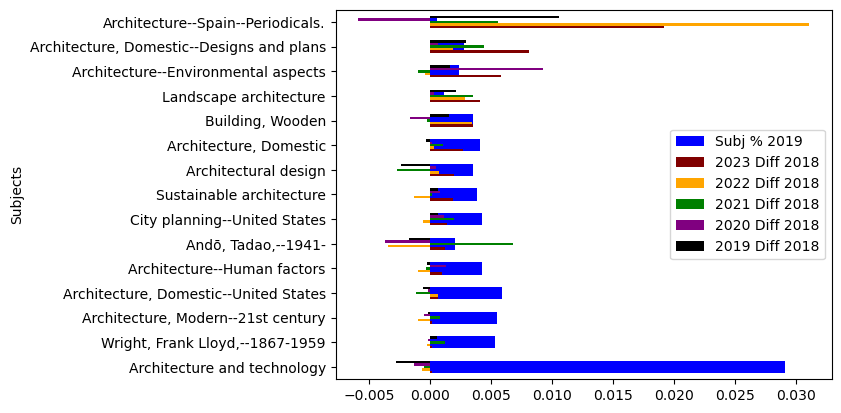

In [99]:
ax = diff_df2023.head(15).plot(x="Subjects", y='Subj % 2019', kind="barh", color="blue") 
#ax
diff_all_plots = diff_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['2023 Diff 2018', '2022 Diff 2018', '2021 Diff 2018', '2020 Diff 2018', '2019 Diff 2018'], kind="barh", ax=ax, color=["maroon", "orange", "green", "purple", "black"])
diff_all_plots

<Axes: ylabel='Subjects'>

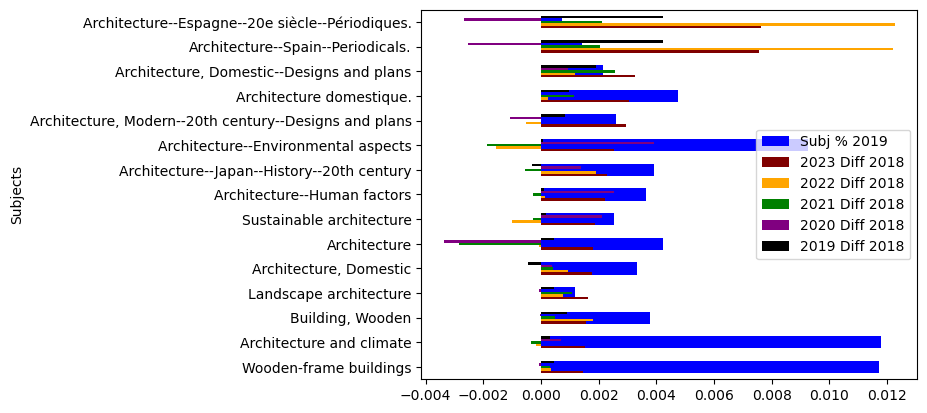

In [100]:
ax = diff_three_df2023.head(15).plot(x="Subjects", y='Subj % 2019', kind="barh", color="blue") 

diff_all_plots = diff_three_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['2023 Diff 2018', '2022 Diff 2018', '2021 Diff 2018', '2020 Diff 2018', '2019 Diff 2018'], kind="barh", ax=ax, color=["maroon", "orange", "green", "purple", "black"])
diff_all_plots

<Axes: ylabel='Subjects'>

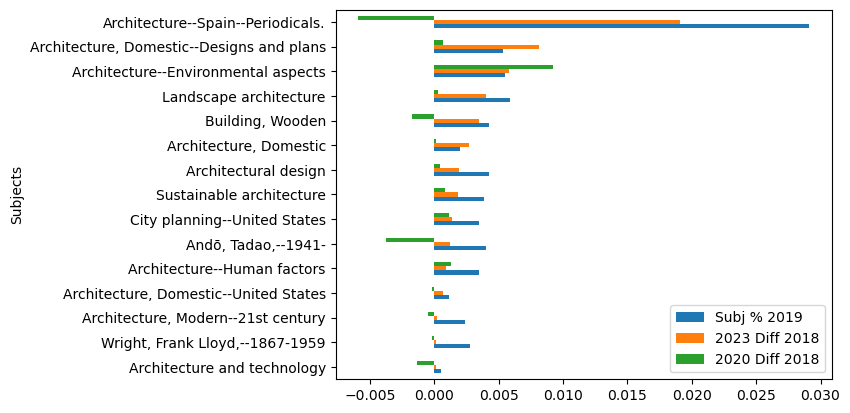

In [101]:
diff2023_plot = diff_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['Subj % 2019', '2023 Diff 2018', '2020 Diff 2018'], kind="barh") 
diff2023_plot

<Axes: ylabel='Subjects'>

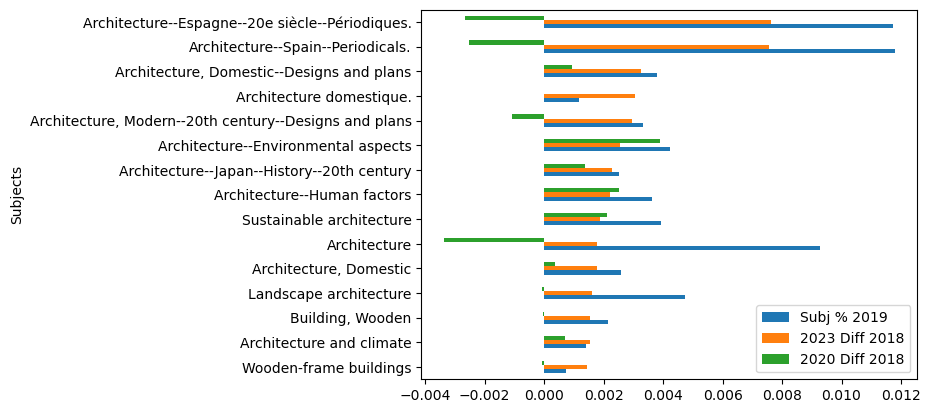

In [102]:
diff2023_plot = diff_three_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['Subj % 2019', '2023 Diff 2018', '2020 Diff 2018'], kind="barh") 
diff2023_plot

<Axes: ylabel='Subjects'>

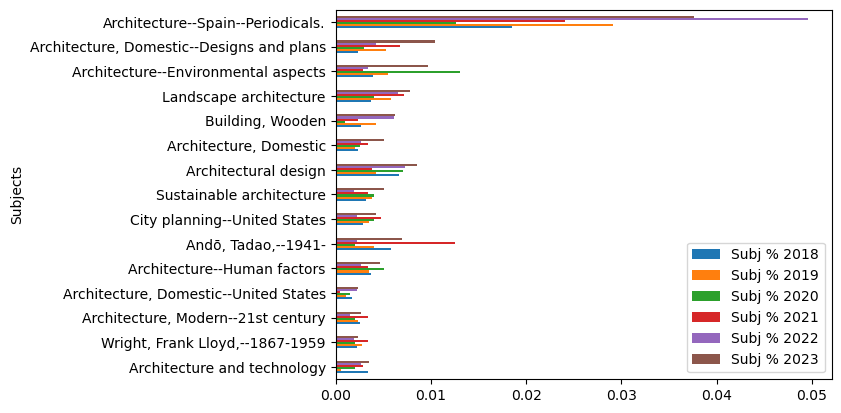

In [109]:
subj_perc_plot = diff_df2023.head(15).sort_values('2023 Diff 2018', ascending=True).plot(x="Subjects", y=['Subj % 2018', 'Subj % 2019', 'Subj % 2020', 'Subj % 2021', 'Subj % 2022', 'Subj % 2023'], kind="barh") 
subj_perc_plot

In [104]:
one_df

,Item Loan Id,Date,In House Loan Indicator,Barcode,Call Number,Circulation Library Code,Owning Library Code,Title,Author,Subjects,MMS Id,Subjects (Names)
0,2252958767220001701,2018,N,31951D01848189P,HT119 .S65 2000,TARCH,TARCH,Postmetropolis : critical studies of cities an...,"Soja, Edward W.",Cities and towns,9913933350001701,NaN
1,2252959196040001701,2018,N,31951000140967E,E159 .H77,TARCH,TARCH,Presence of the past ; a history of the preser...,"Hosmer, Charles Bridgham, 1932-",Monuments--Conservation and restoration--Unite...,9930689970001701,NaN
2,2252965815260001701,2018,N,31951P012191854,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
3,2252965816190001701,2018,N,31951P012191862,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
4,2252965817370001701,2018,N,31951P012055993,Unknown,TARCH,TARCH,Topos : European landscape magazine.,NaN,Landscape architecture--Europe--Periodicals.,9929887730001701,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
20976,2292994879700001701,2023,N,31951D028110868,Quarto NA208 .V45 2007,ZMLAC,TARCH,Atlas of vernacular architecture of the world ...,"Vellinga, Marcel",Vernacular architecture--Maps.,9915376720001701,NaN
20977,2292994880190001701,2023,N,31951D04191050E,NA735.C4 B49 2019,ZMLAC,TARCH,Southern exposure : the overlooked architectur...,"Bey, Lee, 1965- author.",Architecture--Illinois--Chicago--History.,9976759912401701,NaN
20978,2292994880760001701,2023,N,31951D01843540S,Quarto NA9030 .S6 1979,ZMLAC,TARCH,The art of building cities : city building acc...,"Sitte, Camillo, 1843-1903",Urban beautification,9962190700001701,NaN
20979,2292994881510001701,2023,N,31951D01782434F,TS140.N49 .R29x 1999,ZMLAC,TARCH,"Marc Newson / [text, Alice Rawsthorn ; design ...","Rawsthorn, Alice","Newson, Marc,--1963-",9930119410001701,"Newson, Marc, 1963-"


In [105]:

CallNumberCounts = one_df.groupby(['Call Number', 'Subjects', 'Date']).size().reset_index(name='Counts').sort_values(by=['Counts'], ascending=[False])
CallNumberCounts.reset_index(drop = True).head(25)

,Call Number,Subjects,Date,Counts
0,Unknown,Architecture--Periodicals,2019,172
1,Unknown,Architecture--Spain--Periodicals.,2019,155
2,Unknown,Architecture--Periodicals,2018,136
3,Unknown,Architecture--Spain--Periodicals.,2022,129
4,Unknown,Architecture--Spain--Periodicals.,2018,108
5,Unknown,Architecture--Spain--Periodicals.,2023,97
6,Unknown,Architecture--Periodicals,2022,52
7,Unknown,Architecture--Spain--Periodicals.,2021,50
8,Unknown,Architecture--Periodicals,2021,28
9,Unknown,Architecture--Periodicals,2023,28


In [106]:
CallNumberCounts.columns

Index(['Call Number', 'Subjects', 'Date', 'Counts'], dtype='object')

In [107]:
CallNumberCounts = CallNumberCounts[(CallNumberCounts['Call Number'] != 'Unknown')]
CallNumberCounts.head(25).reset_index(drop=True)

,Call Number,Subjects,Date,Counts
0,NA1559.A5 A4 2005,"Andō, Tadao,--1941-",2021,22
1,Quarto NA7126 .G13,"Architecture, Domestic--Designs and plans",2023,20
2,SB470.O5 A2 1977,Landscape architects--United States--Correspon...,2019,16
3,Quarto NA7126 .G13,"Architecture, Domestic--Designs and plans",2019,16
4,Folio NA680 .G57x,"Architecture, Modern--20th century",2019,15
5,Quarto NA2500 .L384 2004,Architecture--History,2021,15
6,NA687 .K66 2014,"Architecture, Modern--21st century--Exhibitions",2018,15
7,NA1559.A5 A4 2005,"Andō, Tadao,--1941-",2018,14
8,NA1046.5.N4 E84 1994,Neoclassicism (Architecture)--France,2018,13
9,NA1559.A5 A4 2005,"Andō, Tadao,--1941-",2019,12
